In [721]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [722]:
train=pd.read_csv(r"C:\Users\shash\Downloads\archive (16)\train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv(r"C:\Users\shash\Downloads\archive (16)\test_Y3wMUE5_7gLdaTN.csv")

In [723]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EXPLORATORY DATA ANALYSIS

In [724]:
train.shape

(614, 13)

In [725]:
test.shape

(367, 12)

In [726]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [727]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [728]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

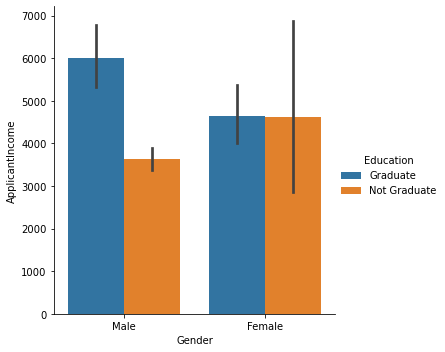

In [729]:
sns.catplot(x="Gender",y="ApplicantIncome",kind="bar",data=train,hue="Education")

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

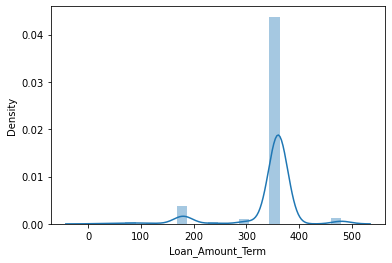

In [730]:
sns.distplot(train["Loan_Amount_Term"])

In [731]:
train["total_income"]=train["CoapplicantIncome"]+train["ApplicantIncome"]

<AxesSubplot:xlabel='total_income', ylabel='LoanAmount'>

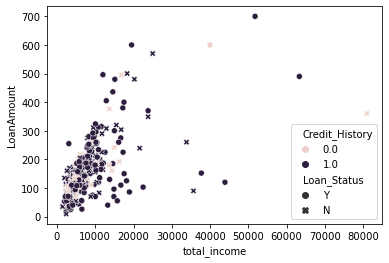

In [732]:
sns.scatterplot(x="total_income",y="LoanAmount",data=train,style="Loan_Status",hue="Credit_History")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

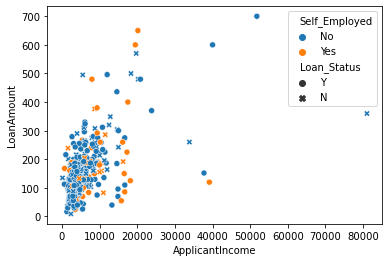

In [733]:
sns.scatterplot(x="ApplicantIncome",y="LoanAmount",data=train,style="Loan_Status",hue="Self_Employed")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

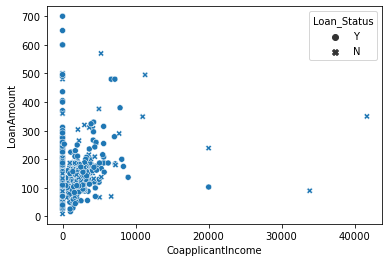

In [734]:
sns.scatterplot(x="CoapplicantIncome",y="LoanAmount",data=train,style="Loan_Status")

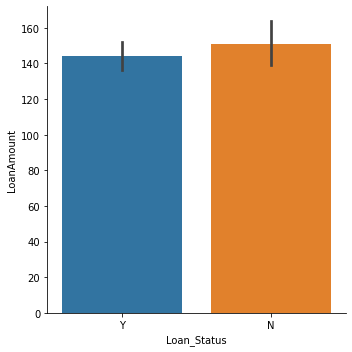

In [735]:
sns.catplot(x="Loan_Status",y="LoanAmount",kind="bar",data=train,)

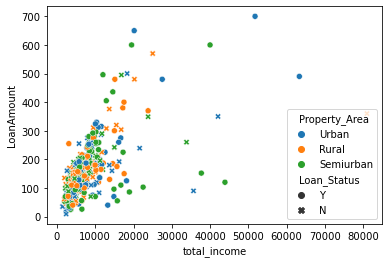

<Figure size 14400x1440 with 0 Axes>

In [736]:
sns.scatterplot(x="total_income",y="LoanAmount",data=train,style="Loan_Status",hue="Property_Area")
plt.figure(figsize=(200,20))
plt.show()

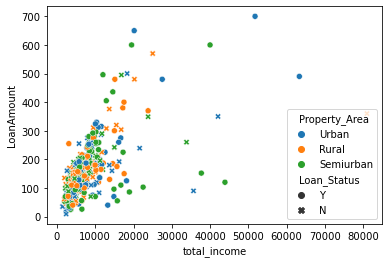

<Figure size 14400x1440 with 0 Axes>

In [737]:
sns.scatterplot(x="total_income",y="LoanAmount",data=train,style="Loan_Status",hue="Property_Area")
plt.figure(figsize=(200,20))
plt.show()

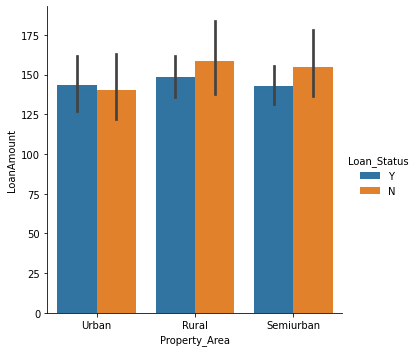

In [738]:
sns.catplot(x="Property_Area",y="LoanAmount",kind="bar",data=train,hue="Loan_Status")

<AxesSubplot:xlabel='total_income', ylabel='LoanAmount'>

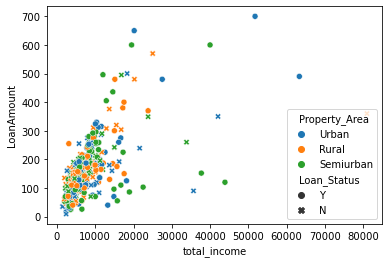

In [739]:
sns.scatterplot(x="total_income",y="LoanAmount",data=train,style="Loan_Status",hue="Property_Area")

# MACHINE LEARNING MODEL TRAINING

In [867]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB  
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [741]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
total_income          0
dtype: int64

In [742]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  total_income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [743]:
train["Loan_Status"].replace({"Y":1,"N":0},inplace=True)
train.Dependents.replace({"3+":3},inplace=True)
test.Dependents.replace({"3+":3},inplace=True)

In [744]:
train.drop(columns=["Loan_ID"],inplace=True)

In [745]:
x=train.drop(columns=["Loan_Status"])
y=train["Loan_Status"]

In [746]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=42)

In [747]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape
ytrain.head()

550    0
439    1
394    1
382    1
29     1
Name: Loan_Status, dtype: int64

In [748]:
train.shape
xtrain.isnull().sum()

Gender               13
Married               2
Dependents           12
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       45
Property_Area         0
total_income          0
dtype: int64

In [749]:
trf1=ColumnTransformer([
    ("impute_const",SimpleImputer(fill_value=0),[2,9]),
    ("impute_cat",SimpleImputer(strategy='most_frequent'),[0,1,3,4,10]),
    ("impute_num",SimpleImputer(),[5,6,7,8])
],remainder="passthrough")

In [750]:
trf2=ColumnTransformer([
    ("ohe",OneHotEncoder(sparse=False,handle_unknown="ignore"),[0,1,3,4,10])
],remainder="passthrough")

In [751]:
trf3=ColumnTransformer([
    ("scaling",MinMaxScaler(),slice(0,10))
])

In [816]:
trf4=DecisionTreeClassifier(criterion="entropy")
trf5=GaussianNB() 
trf6=LogisticRegression()

In [817]:
pipe=make_pipeline(trf1,trf2,trf3,trf6)

In [818]:
from sklearn import set_config
set_config(display="diagram")
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_const',
                                                  SimpleImputer(fill_value=0),
                                                  [2]),
                                                 ('impute_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 3, 4, 9]),
                                                 ('impute_num', SimpleImputer(),
                                                  [5, 6, 7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('logisticregression', LogisticRegression())])

In [819]:
ypred=pipe.predict(xtest)

In [820]:
xtrain.Dependents.replace({"3+":3},inplace=True)

In [821]:
xtrain.Dependents.value_counts()

0    185
1     59
2     58
3     33
Name: Dependents, dtype: int64

In [822]:
xtest.Dependents.replace({"3+":3},inplace=True)

In [823]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.38      0.28      0.32        18
           1       0.50      0.62      0.55        21

    accuracy                           0.46        39
   macro avg       0.44      0.45      0.44        39
weighted avg       0.45      0.46      0.45        39



In [824]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,xtrain,ytrain,cv=10,scoring="accuracy").mean()

0.5280672268907562

In [825]:
pipe2=make_pipeline(trf1,trf2,trf3,trf5)

In [762]:
from sklearn import set_config
set_config(display="diagram")
pipe2.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_const',
                                                  SimpleImputer(fill_value=0),
                                                  [2, 9]),
                                                 ('impute_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 3, 4, 10]),
                                                 ('impute_num', SimpleImputer(),
                                                  [5, 6, 7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 10])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('gaussiannb', GaussianNB())])

In [763]:
ypred=pipe2.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.64      0.33      0.44        21
           1       0.73      0.90      0.80        41

    accuracy                           0.71        62
   macro avg       0.68      0.62      0.62        62
weighted avg       0.70      0.71      0.68        62



In [764]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe2,xtrain,ytrain,cv=10,scoring="accuracy").mean()
xtrain.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'total_income'],
      dtype='object')

In [765]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
550,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,6633.0
439,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,7142.0
394,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,4500.0
382,Female,No,0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban,6000.0
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,5833.0


In [826]:
t=pd.DataFrame(np.array([["Male","Yes","3","Not Grduate","No",1000,0,138,360,1,"Rural",1000]]),columns=xtrain.columns)

ValueError: Shape of passed values is (1, 12), indices imply (1, 11)

In [827]:
ypred=pipe.predict(t)

In [768]:
ypred

array([0], dtype=int64)

In [769]:
ypred

array([0], dtype=int64)

In [770]:
np.array(ytest)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [771]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [772]:
one=train[train["Loan_Status"]==1]
zero=train[train["Loan_Status"]==0]

In [773]:
one=one.sample(192)

In [774]:
one.shape,zero.shape

((192, 13), (192, 13))

In [775]:
train=pd.concat([one,zero])

In [776]:
x=train.drop(columns=["Loan_Status"])
y=train["Loan_Status"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=42)

In [777]:
trf1=ColumnTransformer([
    ("impute_const",SimpleImputer(fill_value=0),[2,9]),
    ("impute_cat",SimpleImputer(strategy='most_frequent'),[0,1,3,4,10]),
    ("impute_num",SimpleImputer(),[5,6,7,8])
],remainder="passthrough")

In [778]:
trf2=ColumnTransformer([
    ("ohe",OneHotEncoder(sparse=False,handle_unknown="ignore"),[0,1,3,4,10])
],remainder="passthrough")

In [779]:
trf3=ColumnTransformer([
    ("scaling",MinMaxScaler(),slice(0,10))
])

In [780]:
trf4=DecisionTreeClassifier(criterion="entropy")
trf5=GaussianNB() 

In [781]:
pipe=make_pipeline(trf1,trf2,trf3,trf4)
from sklearn import set_config
set_config(display="diagram")
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_const',
                                                  SimpleImputer(fill_value=0),
                                                  [2, 9]),
                                                 ('impute_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 3, 4, 10]),
                                                 ('impute_num', SimpleImputer(),
                                                  [5, 6, 7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 10])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [782]:
ypred=pipe.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.7435897435897436
              precision    recall  f1-score   support

           0       0.90      0.50      0.64        18
           1       0.69      0.95      0.80        21

    accuracy                           0.74        39
   macro avg       0.79      0.73      0.72        39
weighted avg       0.79      0.74      0.73        39



In [783]:
pipe2=make_pipeline(trf1,trf2,trf3,trf5)
from sklearn import set_config
set_config(display="diagram")
pipe2.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_const',
                                                  SimpleImputer(fill_value=0),
                                                  [2, 9]),
                                                 ('impute_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 3, 4, 10]),
                                                 ('impute_num', SimpleImputer(),
                                                  [5, 6, 7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 10])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('gaussiannb', GaussianNB())])

In [784]:
ypred=pipe2.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64        18
           1       0.69      0.95      0.80        21

    accuracy                           0.74        39
   macro avg       0.79      0.73      0.72        39
weighted avg       0.79      0.74      0.73        39



In [785]:
t=pd.DataFrame(np.array([["Male","Yes",3,"Grduate","No",11000,110,1138,360,0,"Urban",11000]]),columns=xtrain.columns)

In [786]:
pipe.predict(t)

array([0], dtype=int64)

In [787]:
train.drop(columns=["Credit_History"],inplace=True)

In [788]:
one=train[train["Loan_Status"]==1]
zero=train[train["Loan_Status"]==0]

In [789]:
one=one.sample(192)
one.shape,zero.shape

((192, 12), (192, 12))

In [790]:
train=pd.concat([one,zero])

In [791]:
x=train.drop(columns=["Loan_Status"])
y=train["Loan_Status"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=42)
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,total_income
340,Male,Yes,3,Not Graduate,No,2647,1587.0,173.0,360.0,Rural,4234.0
560,Male,Yes,2,Not Graduate,No,3675,242.0,108.0,360.0,Semiurban,3917.0
255,Female,No,3,Graduate,No,3083,0.0,255.0,360.0,Rural,3083.0
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,Semiurban,8588.0
425,Male,Yes,0,Graduate,No,2666,4300.0,121.0,360.0,Rural,6966.0


In [792]:
trf1=ColumnTransformer([
    ("impute_const",SimpleImputer(fill_value=0),[2]),
    ("impute_cat",SimpleImputer(strategy='most_frequent'),[0,1,3,4,9]),
    ("impute_num",SimpleImputer(),[5,6,7,8])
],remainder="passthrough")

In [793]:
trf2=ColumnTransformer([
    ("ohe",OneHotEncoder(sparse=False,handle_unknown="ignore"),[0,1,3,4,9])
],remainder="passthrough")

In [794]:
trf3=ColumnTransformer([
    ("scaling",MinMaxScaler(),slice(0,10))
])

In [830]:
trf4=DecisionTreeClassifier(criterion="entropy")
trf5=GaussianNB() 
trf6=LogisticRegression()

In [831]:
pipe=make_pipeline(trf1,trf2,trf3,trf6)
from sklearn import set_config
set_config(display="diagram")
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_const',
                                                  SimpleImputer(fill_value=0),
                                                  [2]),
                                                 ('impute_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 3, 4, 9]),
                                                 ('impute_num', SimpleImputer(),
                                                  [5, 6, 7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('logisticregression', LogisticRegression())])

In [832]:
ypred=pipe.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.46153846153846156
              precision    recall  f1-score   support

           0       0.38      0.28      0.32        18
           1       0.50      0.62      0.55        21

    accuracy                           0.46        39
   macro avg       0.44      0.45      0.44        39
weighted avg       0.45      0.46      0.45        39



In [833]:
pipe2=make_pipeline(trf1,trf2,trf3,trf5)
from sklearn import set_config
set_config(display="diagram")
pipe2.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_const',
                                                  SimpleImputer(fill_value=0),
                                                  [2]),
                                                 ('impute_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 3, 4, 9]),
                                                 ('impute_num', SimpleImputer(),
                                                  [5, 6, 7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('gaussiannb', GaussianNB())])

In [835]:
ypred=pipe.predict(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.46153846153846156
              precision    recall  f1-score   support

           0       0.38      0.28      0.32        18
           1       0.50      0.62      0.55        21

    accuracy                           0.46        39
   macro avg       0.44      0.45      0.44        39
weighted avg       0.45      0.46      0.45        39



In [856]:
t=pd.DataFrame(np.array([["Male","Yes",1,"Graduate","No",3076,1500,10000,360,"Urban",4576]]),columns=xtrain.columns)

In [857]:
pipe.predict(t)

array([0], dtype=int64)

In [841]:
test["total_income"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [848]:
test.drop(columns=["Credit_History"],inplace=True)
test.shape

(367, 11)

In [850]:
pipe.predict(test)

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [851]:
test.iloc[:10]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,total_income
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Urban,5720
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Urban,4576
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Urban,6800
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,Urban,4886
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Urban,3276
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,Urban,5587
6,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,Semiurban,2226
7,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,Rural,3881
8,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,Urban,13633
9,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,Semiurban,4800


In [806]:
xtrain.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'total_income'],
      dtype='object')

In [807]:
import pickle

In [868]:
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipe2, file)

In [869]:
with open('pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [872]:
loaded_pipeline.predict(t)

array([0], dtype=int64)